In [3]:
import requests
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nba_py as nba
from nba_py import player

In [4]:

import json
from pprint import pprint

with open('GSWvsCLE.json') as data_file:    
    data = json.load(data_file)

    
print data.keys()

[u'gamedate', u'gameid', u'events']


In [5]:
print data['events'][0]['moments'][0][5]

[[-1, -1, 28.64068, 45.40327, 3.54135], [1610612739, 2544, 6.44329, 22.26184, 0.0], [1610612739, 2747, 17.45534, 4.23261, 0.0], [1610612739, 201567, 7.51449, 16.49044, 0.0], [1610612739, 202681, 27.87412, 45.4898, 0.0], [1610612739, 202389, 20.61859, 22.83587, 0.0], [1610612744, 101106, 11.4783, 29.89826, 0.0], [1610612744, 201939, 22.98616, 42.65101, 0.0], [1610612744, 202691, 17.87231, 15.54552, 0.0], [1610612744, 203110, 3.52194, 20.92478, 0.0], [1610612744, 203084, 8.26079, 24.48449, 0.0]]


In [6]:
headers = ["team_id", "player_id", "x_loc", "y_loc", 
           "radius"]

In [7]:
player_moments = []
moments = data['events'][0]['moments']

for moment in moments:
#     print moment
    for player in moment[5]:
#         print player
#         player.extend((moments.index(moment), moment[2], moment[3]))
        player_moments.append(player)
        
# print player_moments

In [8]:
df = pd.DataFrame(player_moments, columns=headers)
df.head(11)

,team_id,player_id,x_loc,y_loc,radius
0,-1,-1,28.64068,45.40327,3.54135
1,1610612739,2544,6.44329,22.26184,0.00000
2,1610612739,2747,17.45534,4.23261,0.00000
3,1610612739,201567,7.51449,16.49044,0.00000
4,1610612739,202681,27.87412,45.48980,0.00000
5,1610612739,202389,20.61859,22.83587,0.00000
6,1610612744,101106,11.47830,29.89826,0.00000
7,1610612744,201939,22.98616,42.65101,0.00000
8,1610612744,202691,17.87231,15.54552,0.00000
9,1610612744,203110,3.52194,20.92478,0.00000


In [9]:
# Get movements from specfic people/ball
ball = df[df.player_id==-1]

court = plt.imread("fullcourt.png")

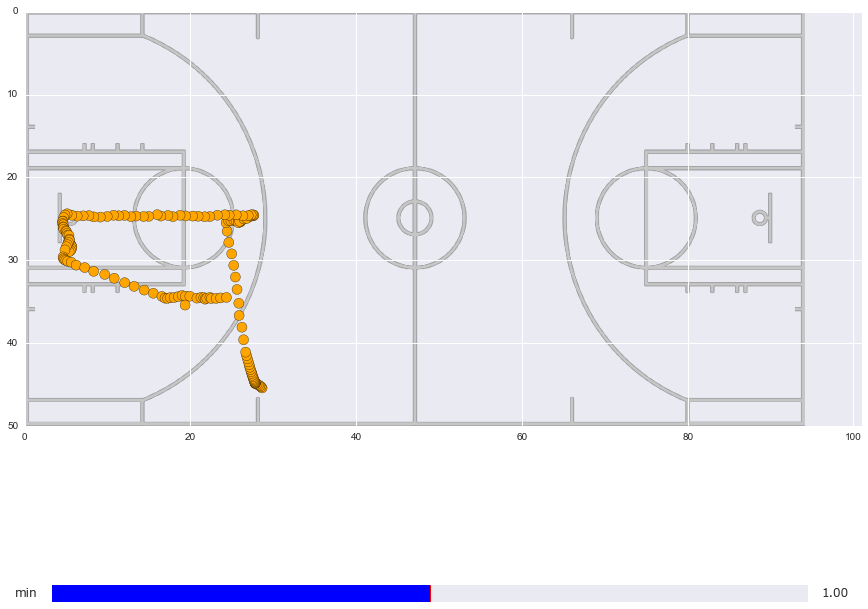

In [10]:
def on_change(val):
    time=int(val)/1
    point1.set_color(col[time][0])
    point2.set_color(col[time][1])
    #point1.size(sizes[time][0])
    #point2.size(sizes[time][1])
    fig.canvas.draw()

plt.figure(figsize=(15, 11.5))
plt.scatter(ball.x_loc, ball.y_loc, c="orange", s=100, zorder=1)
plt.imshow(court, zorder=0, extent=[0,94,50,0])
plt.xlim(0,101)

# plt.savefig("movement.png")
slider_ax = plt.axes([0.15, 0.05, 0.7, 0.02])
slider = Slider(slider_ax, "min", 0, 2, valinit=1, color='blue')
slider.on_changed(on_change)
plt.show()

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider

def on_change(val):
    time=int(val)/1
    point1.set_color(col[time][0])
    point2.set_color(col[time][1])
    #point1.size(sizes[time][0])
    #point2.size(sizes[time][1])
    fig.canvas.draw()

x=[[.3,.7],[.3,.7],[.3,.7]]
y=[[0.5,0.5],[0.5,0.5],[0.5,0.5]]
z=[[0.5,0.5],[0.5,0.5],[0.5,0.5]]
p=0
col=[['blue','red'],['green','green'],['red','blue']]
sizes=[[100,10],[55,55],[10,100]]
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,0],[0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,1],[0,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0],c='black',zorder=10)
point1=ax.scatter(x[p][0],y[p][0],z[p][0],s=sizes[p][0],color=col[p][0],zorder=0)
point2=ax.scatter(x[p][1],y[p][1],z[p][1],s=sizes[p][1],color=col[p][1],zorder=0)
ax.set_xlabel('Width')
ax.set_ylabel('Depth')
ax.set_zlabel('Height')
slider_ax = plt.axes([0.15, 0.05, 0.7, 0.02])
slider = Slider(slider_ax, "min", 0, 2, valinit=1, color='blue')
slider.on_changed(on_change)
pyplot.show()

/usr/lib/pymodules/python2.7/mpl_toolkits/mplot3d/axes3d.py:1088: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.button_pressed in self._rotate_btn:
